In [5]:
import os
print(os.getcwd())  # This prints the current working directory

C:\Users\APPLE\Documents\Soumya\Data Analyst\Fake News Detection


In [8]:
import os
print(os.path.exists(r"C:\Users\APPLE\Documents\Soumya\Data Analyst/Fake News Detection/True.csv"))
print(os.path.exists(r"C:\Users\APPLE\Documents\Soumya\Data Analyst/Fake News Detection/Fake.csv"))

True
True


In [10]:
true_df = pd.read_csv(r"C:\Users\APPLE\Documents\Soumya\Data Analyst\Fake News Detection\True.csv")
fake_df = pd.read_csv(r"C:\Users\APPLE\Documents\Soumya\Data Analyst\Fake News Detection\Fake.csv")

In [11]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [12]:
import pandas as pd

# Add a label column (1 = Real News, 0 = Fake News)
true_df["label"] = 1
fake_df["label"] = 0

# Combine both datasets
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

# Check dataset structure
print(df.head())
print(df.info())
print(df['label'].value_counts())  # Check class distribution

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 

In [13]:
df.drop(columns=["subject", "date"], inplace=True)  # Remove metadata columns
df.dropna(inplace=True)  # Drop missing values

In [14]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df["clean_text"] = df["text"].apply(clean_text)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])  # Convert text into numerical values
y = df["label"]  # Target variable

# Split into Training & Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy & Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9885300668151448
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Accuracy
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.9356347438752785


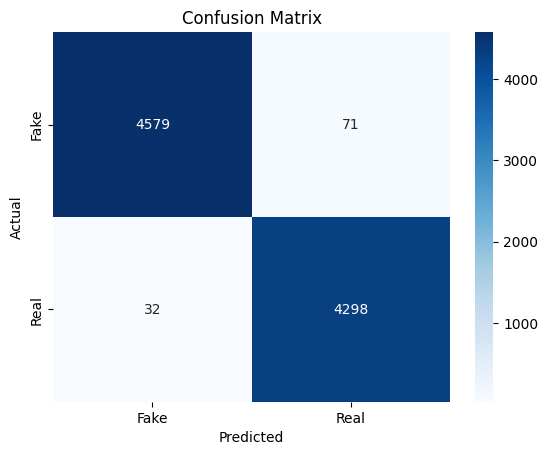

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()